# StockPredict: Advanced Stock Market Prediction and Forecasting System
**Nazmul Farooquee**



## 1. Project Overview and Scope

### 1.1 Project Overview

**StockPredict** is an advanced stock market prediction and forecasting system designed to serve the needs of professional investors, banks, financial institutions, fund managers, private equity managers, and hedge fund managers. The system leverages state-of-the-art machine learning and deep learning algorithms to provide accurate and actionable insights for financial decision-making. By utilizing historical stock market data, macroeconomic indicators, and sophisticated predictive models, StockPredict aims to enhance investment strategies and optimize portfolio performance.

#### Objectives

- **Accurate Predictions:** Provide highly accurate stock price predictions to aid in investment decision-making.
- **Comprehensive Analysis:** Deliver a thorough analysis of stock trends and patterns using multiple models.
- **User-Friendly Interface:** Develop an easy-to-use interface for accessing predictions and visualizations.
- **Real-Time Data:** Ensure up-to-date predictions using real-time data from reliable financial APIs.

### 1.2 Scope

- **Data Sources:** Utilize Alpha Vantage, Yahoo Finance, Naver Finance, World Bank, OECD, and FRED APIs to fetch historical and real-time stock data.
- **Stock Selection:** Allow users to analyze any stock of their choice by entering the stock symbol.
- **Macroeconomic Indicators:** Incorporate key macroeconomic indicators like interest rates, bond yields, GDP growth rate, inflation rate, and unemployment rate to enhance model robustness.
- **Predictive Models:** Implement multiple predictive models including ARIMA, GARCH, Prophet, and LSTM.
- **Visualization:** Create high-quality visualizations to illustrate the predictions and historical data trends.
- **Deployment:** Provide a framework for deploying the models in real-time applications using Flask or similar platforms.

### 1.3 Disclaimer

**Disclaimer:** This project is for learning purposes only. The predictions and analyses generated by StockPredict should not be considered financial advice. Users should seek professional advice before making any investment decisions based on the outputs of this project.


## 2. Fetching and Saving Stock Data

### 2.1 Fetching Weekly Stock Data

To fetch the weekly stock data for Apple, we will use the Alpha Vantage API. The following steps outline the process:

1. **API Key:** Obtain an API key from Alpha Vantage. This key is required to access the API.
2. **Store API Key Securely:** Store the API key in a `config.json` file to keep it private. The `config.json` file should look like this:
    ```json
    {
        "alpha_vantage_api_key": "YOUR_API_KEY_HERE"
    }
    ```
3. **Fetch Data:** Use the Alpha Vantage API to fetch the weekly adjusted stock data for Apple.
4. **Save Data:** Save the fetched data into a CSV file for further analysis and processing.

### 2.2 Code to Fetch and Save Stock Data

The following code fetches the weekly stock data for Apple from Alpha Vantage and saves it to a CSV file:





In [1]:
import requests
import pandas as pd
import json

# Function to fetch API key from JSON file
def get_api_key(filepath):
    with open(filepath, 'r') as file:
        config = json.load(file)
    return config['alpha_vantage_api_key']

# Function to fetch weekly stock data from Alpha Vantage
def fetch_weekly_stock_data(symbol, api_key):
    base_url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_WEEKLY_ADJUSTED",
        "symbol": symbol,
        "apikey": api_key
    }
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    if "Weekly Adjusted Time Series" in data:
        df = pd.DataFrame.from_dict(data["Weekly Adjusted Time Series"], orient="index")
        df.index = pd.to_datetime(df.index)
        df.columns = [col.split(". ")[1] for col in df.columns]
        df = df.rename(columns={
            "open": "open", 
            "high": "high", 
            "low": "low", 
            "close": "close", 
            "adjusted close": "adjusted_close", 
            "volume": "volume", 
            "dividend amount": "dividend"
        })
        df = df.astype(float)
        return df
    else:
        raise ValueError("Unexpected data format received from Alpha Vantage API")

# Fetch API key from JSON file
api_key = get_api_key('config.json')

# Fetch data for Apple
apple_data = fetch_weekly_stock_data("AAPL", api_key)

# Save data to CSV
apple_data.to_csv('apple_weekly.csv')

# Display the first few rows of the DataFrame
print("Apple Data")
print(apple_data.head())


Apple Data
              open    high     low   close  adjusted_close       volume  \
2024-07-26  227.01  227.78  214.62  217.96          217.96  242848766.0   
2024-07-19  236.48  237.23  222.27  224.31          224.31  278397452.0   
2024-07-12  227.09  233.08  223.25  230.54          230.54  287640514.0   
2024-07-05  212.09  226.45  211.92  226.34          226.34  216231316.0   
2024-06-28  207.72  216.07  206.59  210.62          210.62  335969485.0   

            dividend  
2024-07-26       0.0  
2024-07-19       0.0  
2024-07-12       0.0  
2024-07-05       0.0  
2024-06-28       0.0  


## 3. Fetching and Saving Macroeconomic Data

### 3.1 Fetching Macroeconomic Data

To fetch the macroeconomic data, we will use the FRED API. The following steps outline the process:

1. **API Key:** Obtain an API key from FRED. This key is required to access the API.
2. **Fetch Data:** Use the FRED API to fetch the required macroeconomic indicators.
3. **Save Data:** Save the fetched data into a CSV file for further analysis and processing.

### 3.2 Code to Fetch and Save Macroeconomic Data

The following code fetches the macroeconomic data from FRED and saves it to a CSV file:



In [2]:
import os
import logging
from fredapi import Fred
import pandas as pd
import json

# Function to fetch API key from JSON file
def get_api_key(filepath, key_name):
    with open(filepath, 'r') as file:
        config = json.load(file)
    return config[key_name]

# Function to fetch and save macroeconomic data
def fetch_and_save_macro_data(fred_api_key, series_dict, save_path, file_name):
    """
    Fetches macroeconomic data from FRED and saves it to a single CSV file.
    
    Parameters:
    fred_api_key (str): FRED API key
    series_dict (dict): Dictionary with FRED series ID as keys and filenames as values
    save_path (str): Path to save the CSV file
    file_name (str): Name of the CSV file
    """
    try:
        # Create directory if it doesn't exist
        if not os.path.exists(save_path):
            os.makedirs(save_path)
            logging.info(f"Created directory: {save_path}")
        
        # Initialize the FRED API client
        fred = Fred(api_key=fred_api_key)
        macro_data = pd.DataFrame()
        
        # Fetch each series and combine into a single DataFrame
        for series_id, column_name in series_dict.items():
            try:
                data = fred.get_series(series_id).to_frame(name=column_name)
                if macro_data.empty:
                    macro_data = data
                else:
                    macro_data = macro_data.join(data, how='outer')
                logging.info(f"Fetched data for {column_name}")
            except Exception as e:
                logging.error(f"Failed to fetch data for {series_id}: {e}")
        
        # Save combined data to CSV
        csv_file_path = os.path.join(save_path, file_name)
        macro_data.to_csv(csv_file_path)
        logging.info(f"Saved combined macroeconomic data to {csv_file_path}")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

if __name__ == "__main__":
    # Fetch FRED API key from JSON file
    fred_api_key = get_api_key('config.json', 'fred_api_key')

    # Define the macroeconomic data series to fetch
    series_dict = {
        'DFF': 'interest_rate',  # Effective Federal Funds Rate
        'A191RL1Q225SBEA': 'gdp_growth',  # Real GDP growth rate
        'UNRATE': 'unemployment_rate',  # Unemployment Rate
        'GS10': 'bond_yield'  # 10-Year Treasury Constant Maturity Rate
    }

    # Fetch and save macroeconomic data
    fetch_and_save_macro_data(fred_api_key, series_dict, 'macro_data', 'macro_data_combined.csv')



In [3]:
import pandas as pd

# Load the fetched macroeconomic data
macro_data = pd.read_csv('macro_data/macro_data_combined.csv', index_col=0, parse_dates=True)

# Display the first few rows of the macroeconomic data
print("Macroeconomic Data (first few rows):")
print(macro_data.head())

# Display the last few rows of the macroeconomic data
print("\nMacroeconomic Data (last few rows):")
print(macro_data.tail())

# Check for missing values in the dataframe
missing_values = macro_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Display summary statistics for each column
summary_stats = macro_data.describe()
print("\nSummary Statistics for each column:")
print(summary_stats)


Macroeconomic Data (first few rows):
            interest_rate  gdp_growth  unemployment_rate  bond_yield
1947-04-01            NaN        -1.0                NaN         NaN
1947-07-01            NaN        -0.8                NaN         NaN
1947-10-01            NaN         6.4                NaN         NaN
1948-01-01            NaN         6.2                3.4         NaN
1948-02-01            NaN         NaN                3.8         NaN

Macroeconomic Data (last few rows):
            interest_rate  gdp_growth  unemployment_rate  bond_yield
2024-07-21           5.33         NaN                NaN         NaN
2024-07-22           5.33         NaN                NaN         NaN
2024-07-23           5.33         NaN                NaN         NaN
2024-07-24           5.33         NaN                NaN         NaN
2024-07-25           5.33         NaN                NaN         NaN

Missing values in each column:
interest_rate           81
gdp_growth           25365
unemployment

### 4. Merging Stock Data with Macroeconomic Data

In this step, we will merge the stock data with the macroeconomic data, focusing on the relevant columns: `adjusted_close`, `volume`, `interest_rate`, `gdp_growth`, `unemployment_rate`, and `bond_yield`.




In [4]:
import pandas as pd

# Load the stock data and macroeconomic data
stock_data = pd.read_csv('apple_weekly.csv', index_col=0, parse_dates=True)
macro_data = pd.read_csv('macro_data/macro_data_combined.csv', index_col=0, parse_dates=True)

# Merge the stock data with the macroeconomic data
merged_data = pd.merge(stock_data, macro_data, left_index=True, right_index=True, how='inner')

# Keep only the relevant columns
filtered_data = merged_data[['adjusted_close', 'volume', 'interest_rate', 'gdp_growth', 'unemployment_rate', 'bond_yield']]

# Display the first few rows of the merged data
print("Filtered Merged Data (first few rows):")
print(filtered_data.head())

# Save the filtered merged data to a new CSV file
filtered_data.to_csv('filtered_merged_data.csv')


Filtered Merged Data (first few rows):
            adjusted_close       volume  interest_rate  gdp_growth  \
2024-07-19          224.31  278397452.0           5.33         NaN   
2024-07-12          230.54  287640514.0           5.33         NaN   
2024-07-05          226.34  216231316.0           5.33         NaN   
2024-06-28          210.62  335969485.0           5.33         NaN   
2024-06-21          207.49  506265358.0           5.33         NaN   

            unemployment_rate  bond_yield  
2024-07-19                NaN         NaN  
2024-07-12                NaN         NaN  
2024-07-05                NaN         NaN  
2024-06-28                NaN         NaN  
2024-06-21                NaN         NaN  


### 5. Cleaning the Merged Data

In this step, we will handle missing values in the merged dataset by filling them with the mean of each column. This ensures that our dataset is clean and ready for further analysis.



In [5]:
import pandas as pd

# Load the filtered merged data
filtered_data = pd.read_csv('filtered_merged_data.csv', index_col=0, parse_dates=True)

# Check for missing values in each column
missing_values = filtered_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values by filling them with the mean of each column
filtered_data.fillna(filtered_data.mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after = filtered_data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

# Save the cleaned data to a new CSV file
filtered_data.to_csv('cleaned_filtered_data.csv')

# Display the first few rows of the cleaned data
print("Cleaned Data (first few rows):")
print(filtered_data.head())


Missing values in each column:
 adjusted_close          0
volume                  0
interest_rate           0
gdp_growth           1276
unemployment_rate    1247
bond_yield           1247
dtype: int64
Missing values after handling:
 adjusted_close       0
volume               0
interest_rate        0
gdp_growth           0
unemployment_rate    0
bond_yield           0
dtype: int64
Cleaned Data (first few rows):
            adjusted_close       volume  interest_rate  gdp_growth  \
2024-07-19          224.31  278397452.0           5.33    2.876923   
2024-07-12          230.54  287640514.0           5.33    2.876923   
2024-07-05          226.34  216231316.0           5.33    2.876923   
2024-06-28          210.62  335969485.0           5.33    2.876923   
2024-06-21          207.49  506265358.0           5.33    2.876923   

            unemployment_rate  bond_yield  
2024-07-19            5.72619    3.302619  
2024-07-12            5.72619    3.302619  
2024-07-05            5.72619   

### 6. Exploratory Data Analysis (EDA)

Now that we have a cleaned dataset, we can perform Exploratory Data Analysis (EDA). EDA involves summarizing the main characteristics of the data and visualizing it using various plots and statistical methods. This helps in understanding the data better and uncovering patterns, relationships, and insights.

#### Steps for EDA:

1. **Summary Statistics**: Generate summary statistics for each column.
2. **Correlation Analysis**: Compute the correlation matrix to understand the relationships between different variables.
3. **Visualization**: Create various plots to visualize the data.

#### 1. Summary Statistics

We already generated summary statistics earlier, so we'll move on to correlation analysis and visualization.

#### 2. Correlation Analysis

Let's compute the correlation matrix to see how the different variables relate to each other.



Correlation Matrix:
                   adjusted_close    volume  interest_rate  gdp_growth  \
adjusted_close           1.000000  0.704074       0.096773    0.019413   
volume                   0.704074  1.000000      -0.079698    0.023787   
interest_rate            0.096773 -0.079698       1.000000   -0.001486   
gdp_growth               0.019413  0.023787      -0.001486    1.000000   
unemployment_rate       -0.059038 -0.044140      -0.104224   -0.042163   
bond_yield              -0.042826 -0.062045       0.137254   -0.096580   

                   unemployment_rate  bond_yield  
adjusted_close             -0.059038   -0.042826  
volume                     -0.044140   -0.062045  
interest_rate              -0.104224    0.137254  
gdp_growth                 -0.042163   -0.096580  
unemployment_rate           1.000000   -0.324272  
bond_yield                 -0.324272    1.000000  


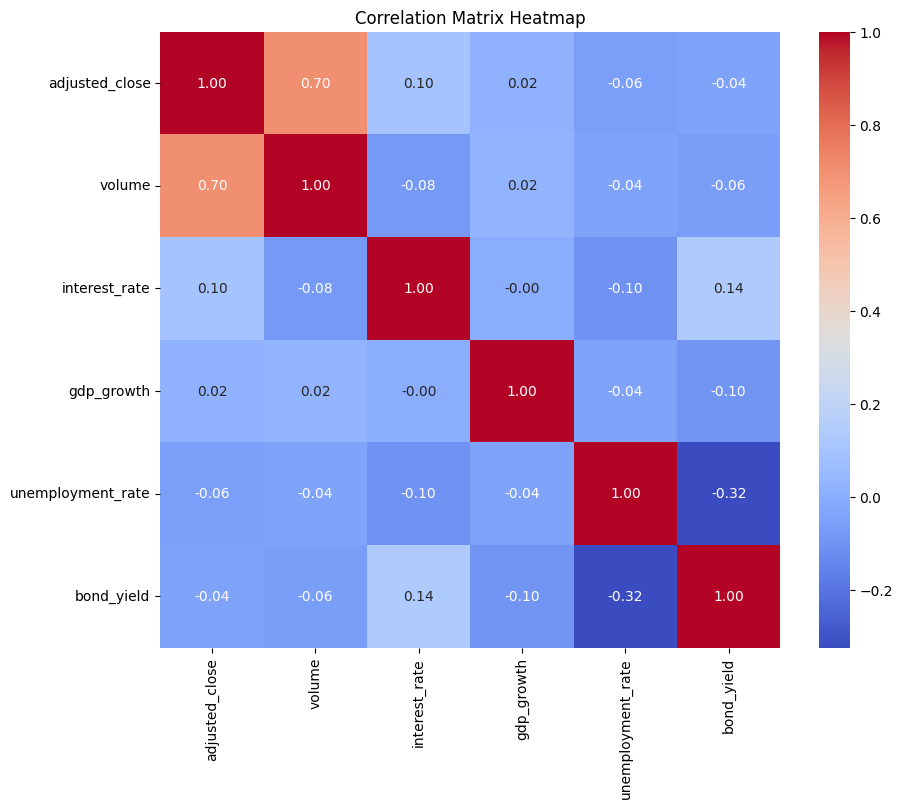

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Compute the correlation matrix
correlation_matrix = cleaned_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### 7. Explanation of Correlation Matrix and Heatmap

**Correlation Matrix:**
- The correlation matrix shows the Pearson correlation coefficients between each pair of variables in the dataset. These coefficients range from -1 to 1, where:
  - 1 indicates a perfect positive correlation,
  - -1 indicates a perfect negative correlation,
  - 0 indicates no correlation.
- Each cell in the matrix represents the correlation between the variables on the corresponding row and column.

**Heatmap:**
- The heatmap is a visual representation of the correlation matrix. It uses colors to represent the correlation coefficients, making it easier to identify strong correlations visually.
  - Darker red indicates a strong positive correlation.
  - Darker blue indicates a strong negative correlation.
  - Lighter shades indicate weaker correlations.

### Detailed Observations:

1. **Adjusted Close vs. Volume:**
   - Correlation Coefficient: 0.704074
   - There is a moderately strong positive correlation between the adjusted close prices and the trading volume. This suggests that as the trading volume increases, the adjusted close prices tend to increase as well.

2. **Adjusted Close vs. Interest Rate:**
   - Correlation Coefficient: 0.096773
   - The adjusted close prices and interest rates have a very weak positive correlation. This indicates that changes in interest rates have a minimal direct impact on the adjusted close prices.

3. **Adjusted Close vs. GDP Growth:**
   - Correlation Coefficient: 0.019413
   - There is an almost negligible positive correlation between the adjusted close prices and GDP growth, suggesting that GDP growth does not significantly influence the adjusted close prices.

4. **Adjusted Close vs. Unemployment Rate:**
   - Correlation Coefficient: -0.059038
   - There is a weak negative correlation between the adjusted close prices and the unemployment rate. This implies that higher unemployment rates might be associated with slightly lower adjusted close prices, but the effect is minimal.

5. **Adjusted Close vs. Bond Yield:**
   - Correlation Coefficient: -0.042826
   - The adjusted close prices and bond yields have a very weak negative correlation, indicating that bond yields have a minimal impact on the adjusted close prices.

6. **Volume vs. Interest Rate:**
   - Correlation Coefficient: -0.079698
   - There is a very weak negative correlation between trading volume and interest rates.

7. **Volume vs. GDP Growth:**
   - Correlation Coefficient: 0.023787
   - The trading volume has a negligible positive correlation with GDP growth.

8. **Volume vs. Unemployment Rate:**
   - Correlation Coefficient: -0.044140
   - There is a very weak negative correlation between trading volume and the unemployment rate.

9. **Volume vs. Bond Yield:**
   - Correlation Coefficient: -0.062045
   - The trading volume has a weak negative correlation with bond yields.

10. **Interest Rate vs. GDP Growth:**
    - Correlation Coefficient: -0.001486
    - There is almost no correlation between interest rates and GDP growth.

11. **Interest Rate vs. Unemployment Rate:**
    - Correlation Coefficient: -0.104224
    - There is a weak negative correlation between interest rates and the unemployment rate.

12. **Interest Rate vs. Bond Yield:**
    - Correlation Coefficient: 0.137254
    - There is a weak positive correlation between interest rates and bond yields.

13. **GDP Growth vs. Unemployment Rate:**
    - Correlation Coefficient: -0.042163
    - There is a very weak negative correlation between GDP growth and the unemployment rate.

14. **GDP Growth vs. Bond Yield:**
    - Correlation Coefficient: -0.096580
    - There is a weak negative correlation between GDP growth and bond yields.

15. **Unemployment Rate vs. Bond Yield:**
    - Correlation Coefficient: -0.324272
    - There is a moderate negative correlation between the unemployment rate and bond yields. This suggests that higher unemployment rates are somewhat associated with lower bond yields.


### 8. Trend Analysis

To understand the evolution of key variables over time, we will plot line charts for each variable in the dataset. These variables include adjusted close price, volume, interest rate, GDP growth, unemployment rate, and bond yield.



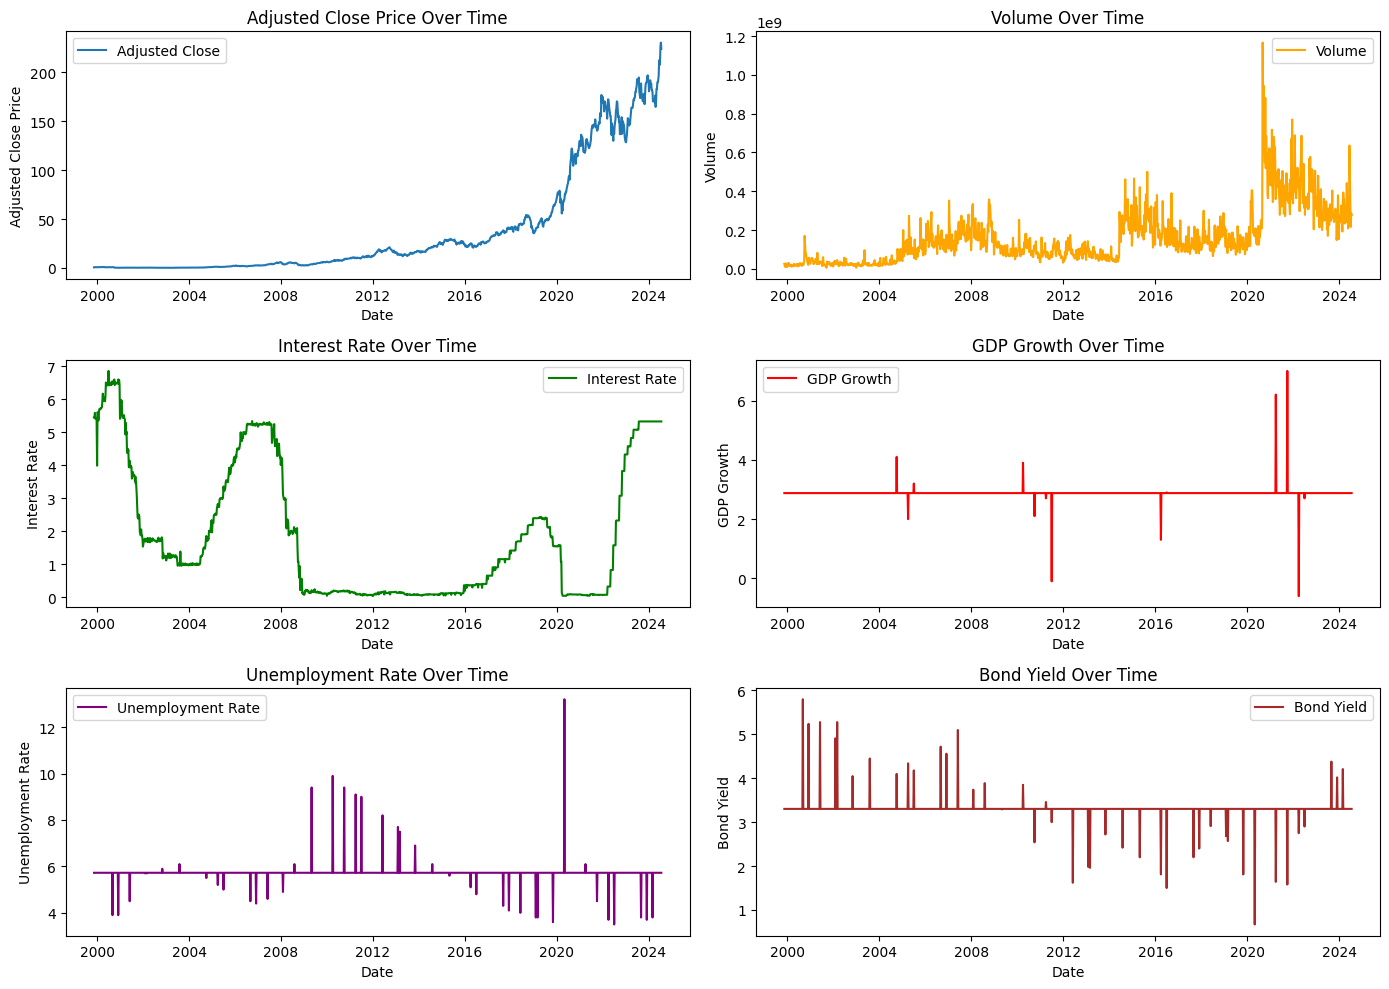

In [7]:
import matplotlib.pyplot as plt

# Plot trends for each variable
plt.figure(figsize=(14, 10))

# Adjusted Close Price
plt.subplot(3, 2, 1)
plt.plot(filtered_data.index, filtered_data['adjusted_close'], label='Adjusted Close')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Volume
plt.subplot(3, 2, 2)
plt.plot(filtered_data.index, filtered_data['volume'], label='Volume', color='orange')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Interest Rate
plt.subplot(3, 2, 3)
plt.plot(filtered_data.index, filtered_data['interest_rate'], label='Interest Rate', color='green')
plt.title('Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()

# GDP Growth
plt.subplot(3, 2, 4)
plt.plot(filtered_data.index, filtered_data['gdp_growth'], label='GDP Growth', color='red')
plt.title('GDP Growth Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()

# Unemployment Rate
plt.subplot(3, 2, 5)
plt.plot(filtered_data.index, filtered_data['unemployment_rate'], label='Unemployment Rate', color='purple')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()

# Bond Yield
plt.subplot(3, 2, 6)
plt.plot(filtered_data.index, filtered_data['bond_yield'], label='Bond Yield', color='brown')
plt.title('Bond Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()

plt.tight_layout()
plt.show()


### Trend Analysis Based on Graphs

The visualizations above provide a comprehensive view of the trends over time for the adjusted close price of the stock, trading volume, interest rate, GDP growth, unemployment rate, and bond yield. Here’s a detailed explanation of the trends observed:

1. **Adjusted Close Price Over Time:**
   - The adjusted close price of the stock shows a significant upward trend over time, with notable increases particularly after 2012.
   - There is a sharp rise around 2020, which could be due to market reactions to global events, such as the COVID-19 pandemic, followed by continued growth into 2024.

2. **Volume Over Time:**
   - Trading volume has varied widely over the years, with significant spikes observed around major market events.
   - There is a noticeable increase in volume around 2020, aligning with the global market volatility during the COVID-19 pandemic.
   - After the spike, the volume remains relatively high, indicating increased trading activity.

3. **Interest Rate Over Time:**
   - The interest rate shows cyclical behavior with several peaks and troughs.
   - Major peaks are observed around 2000, 2007-2008 (coinciding with the financial crisis), and a gradual rise starting from 2015-2016.
   - There is a significant drop around 2020, likely due to monetary policies in response to the COVID-19 pandemic, followed by a steady rise into 2024.

4. **GDP Growth Over Time:**
   - GDP growth shows substantial fluctuations, with periods of high growth and sharp declines.
   - Notable drops are seen around the 2008 financial crisis and the 2020 COVID-19 pandemic, reflecting the economic downturns during these periods.
   - Post-2020, there is a noticeable rebound, indicating economic recovery efforts.

5. **Unemployment Rate Over Time:**
   - The unemployment rate exhibits periodic spikes, notably around 2008-2010 and 2020, correlating with economic recessions.
   - There is a sharp increase in unemployment during the COVID-19 pandemic in 2020, followed by a gradual decrease as the economy recovers.

6. **Bond Yield Over Time:**
   - Bond yields display a general downward trend over the years, with some periods of increase.
   - Peaks are seen around 2000, 2007, and slight increases post-2016, with a sharp decline around 2020 due to economic policies during the pandemic.
   - There is a slight upward trend post-2020, indicating market adjustments.


### 9. Distribution Analysis

To understand the distribution of each variable in the dataset, we will plot histograms and box plots. These visualizations will help us identify the central tendency, dispersion, and presence of any outliers in the data.



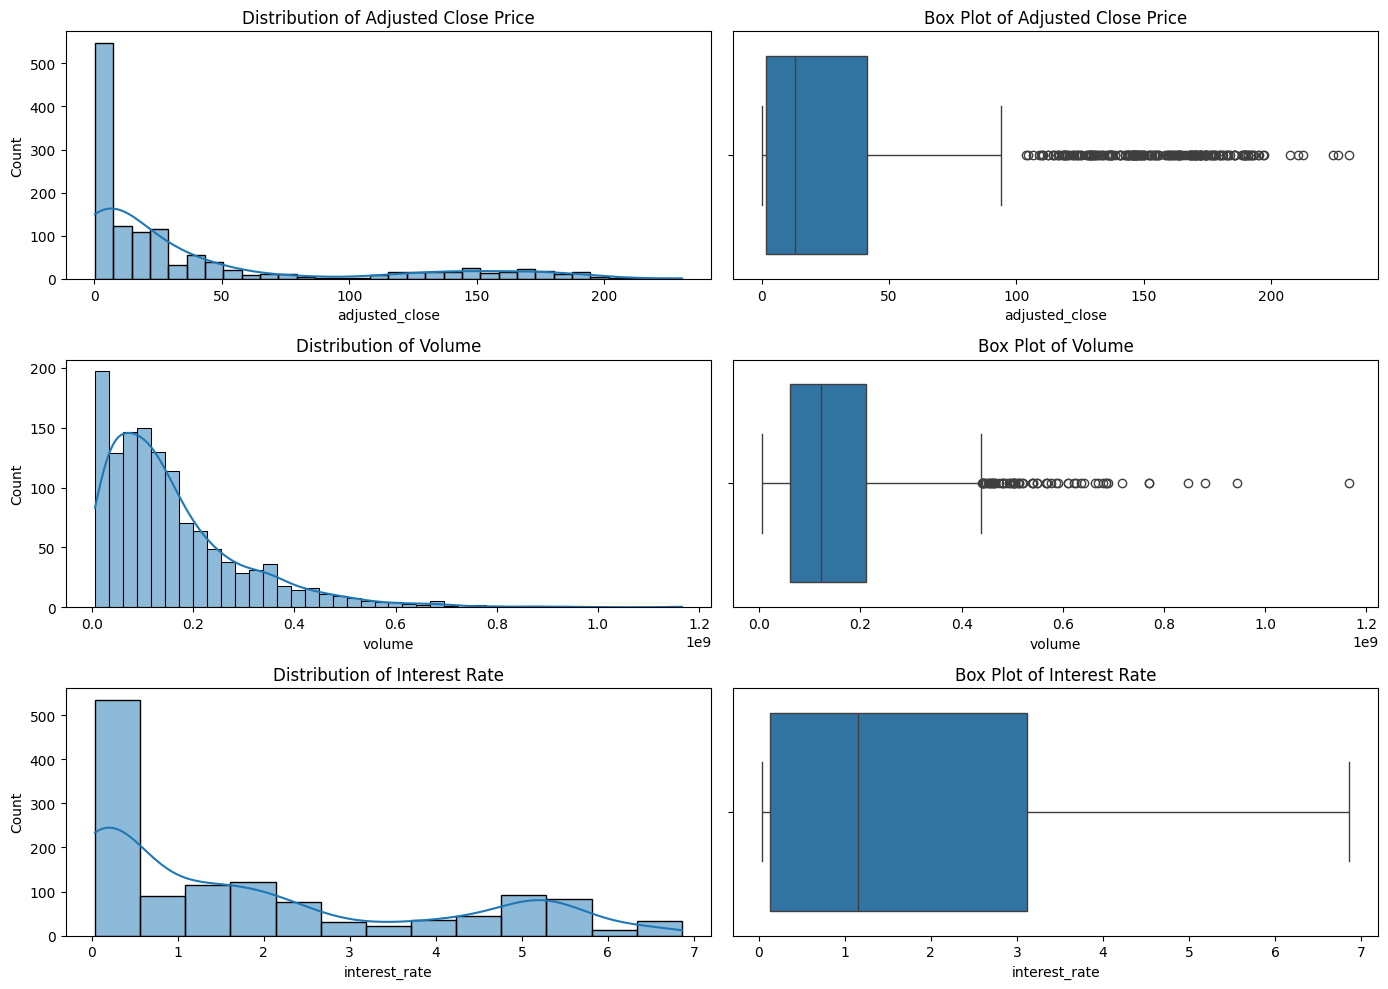

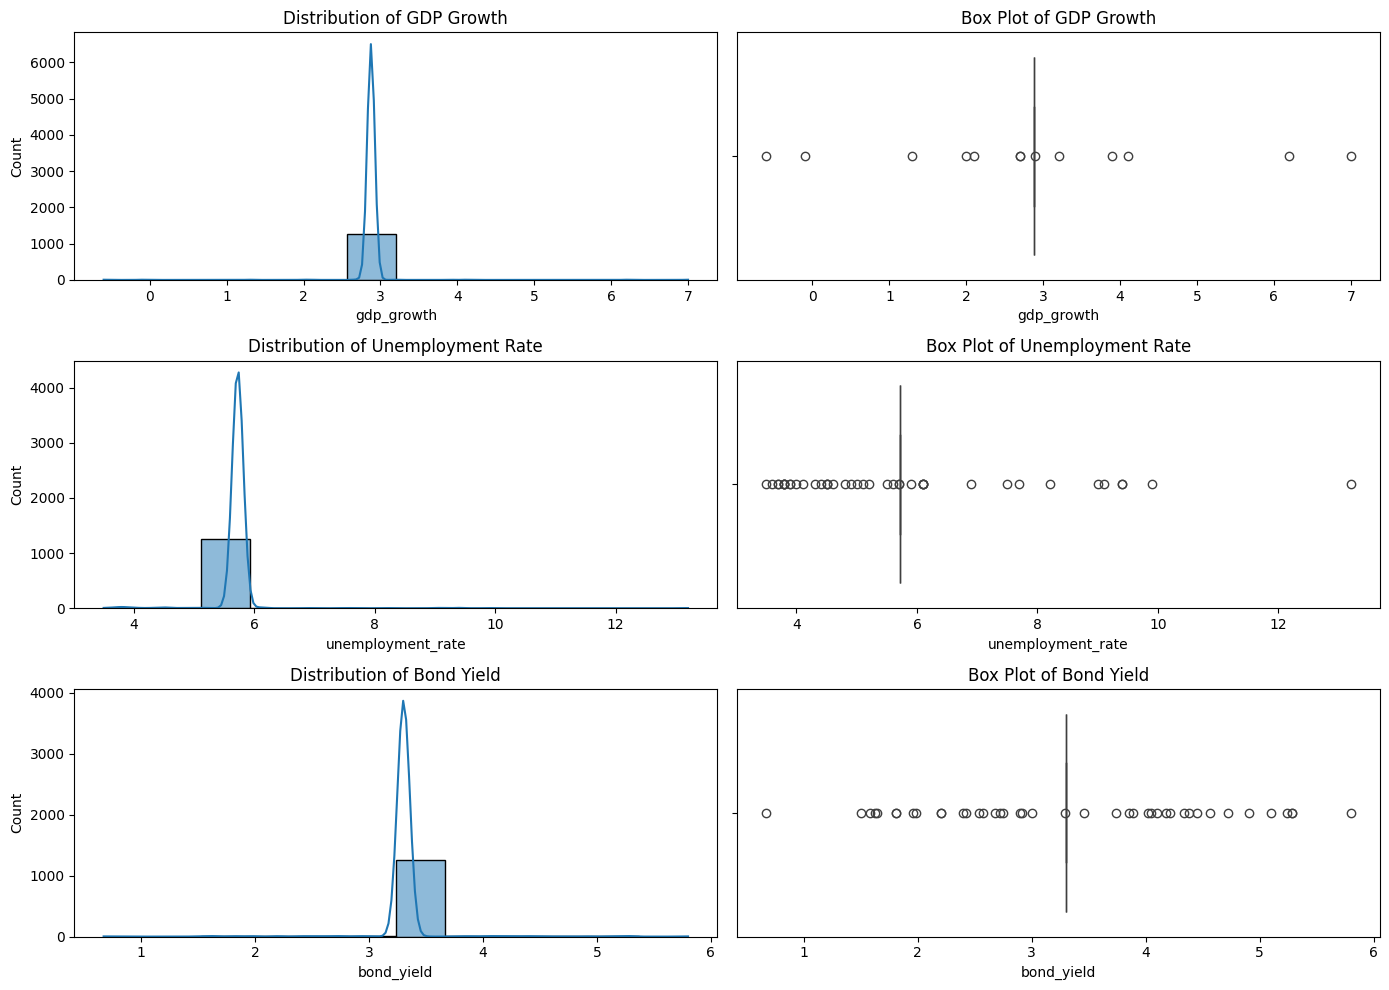

In [8]:
import seaborn as sns

# Plot histograms and box plots for each variable
plt.figure(figsize=(14, 10))

# Adjusted Close Price
plt.subplot(3, 2, 1)
sns.histplot(filtered_data['adjusted_close'], kde=True)
plt.title('Distribution of Adjusted Close Price')

plt.subplot(3, 2, 2)
sns.boxplot(x=filtered_data['adjusted_close'])
plt.title('Box Plot of Adjusted Close Price')

# Volume
plt.subplot(3, 2, 3)
sns.histplot(filtered_data['volume'], kde=True)
plt.title('Distribution of Volume')

plt.subplot(3, 2, 4)
sns.boxplot(x=filtered_data['volume'])
plt.title('Box Plot of Volume')

# Interest Rate
plt.subplot(3, 2, 5)
sns.histplot(filtered_data['interest_rate'], kde=True)
plt.title('Distribution of Interest Rate')

plt.subplot(3, 2, 6)
sns.boxplot(x=filtered_data['interest_rate'])
plt.title('Box Plot of Interest Rate')

plt.tight_layout()
plt.show()

# Repeat for GDP Growth, Unemployment Rate, and Bond Yield
plt.figure(figsize=(14, 10))

# GDP Growth
plt.subplot(3, 2, 1)
sns.histplot(filtered_data['gdp_growth'], kde=True)
plt.title('Distribution of GDP Growth')

plt.subplot(3, 2, 2)
sns.boxplot(x=filtered_data['gdp_growth'])
plt.title('Box Plot of GDP Growth')

# Unemployment Rate
plt.subplot(3, 2, 3)
sns.histplot(filtered_data['unemployment_rate'], kde=True)
plt.title('Distribution of Unemployment Rate')

plt.subplot(3, 2, 4)
sns.boxplot(x=filtered_data['unemployment_rate'])
plt.title('Box Plot of Unemployment Rate')

# Bond Yield
plt.subplot(3, 2, 5)
sns.histplot(filtered_data['bond_yield'], kde=True)
plt.title('Distribution of Bond Yield')

plt.subplot(3, 2, 6)
sns.boxplot(x=filtered_data['bond_yield'])
plt.title('Box Plot of Bond Yield')

plt.tight_layout()
plt.show()


### Distribution Analysis Explanation

The visualizations above show the distribution and box plots for the adjusted close price, trading volume, and interest rate. Here's a detailed explanation of the observed distributions:

1. **Adjusted Close Price:**
   - **Distribution Plot:** The distribution of the adjusted close price is right-skewed, indicating that most of the stock prices are on the lower end, with fewer instances of high stock prices.
   - **Box Plot:** The box plot shows a high concentration of stock prices below the median, with a significant number of outliers on the higher end. This confirms the right-skewness observed in the distribution plot.

2. **Volume:**
   - **Distribution Plot:** The volume distribution is also right-skewed, suggesting that most trading volumes are on the lower end, with fewer instances of extremely high trading volumes.
   - **Box Plot:** The box plot for volume shows a high concentration of values below the median, with many outliers on the higher end, indicating occasional high trading activities.

3. **Interest Rate:**
   - **Distribution Plot:** The interest rate distribution shows a multimodal pattern with several peaks, suggesting varying levels of interest rates over the period.
   - **Box Plot:** The box plot indicates a wide range of interest rates, with most values concentrated in the lower range. There are no significant outliers, showing a more uniform spread compared to the adjusted close price and volume.


### Rolling Statistics Analysis

Rolling statistics allow us to observe trends and patterns in the data over a specified window of time. For this analysis, we will calculate the rolling mean and rolling standard deviation for the adjusted close price and trading volume.




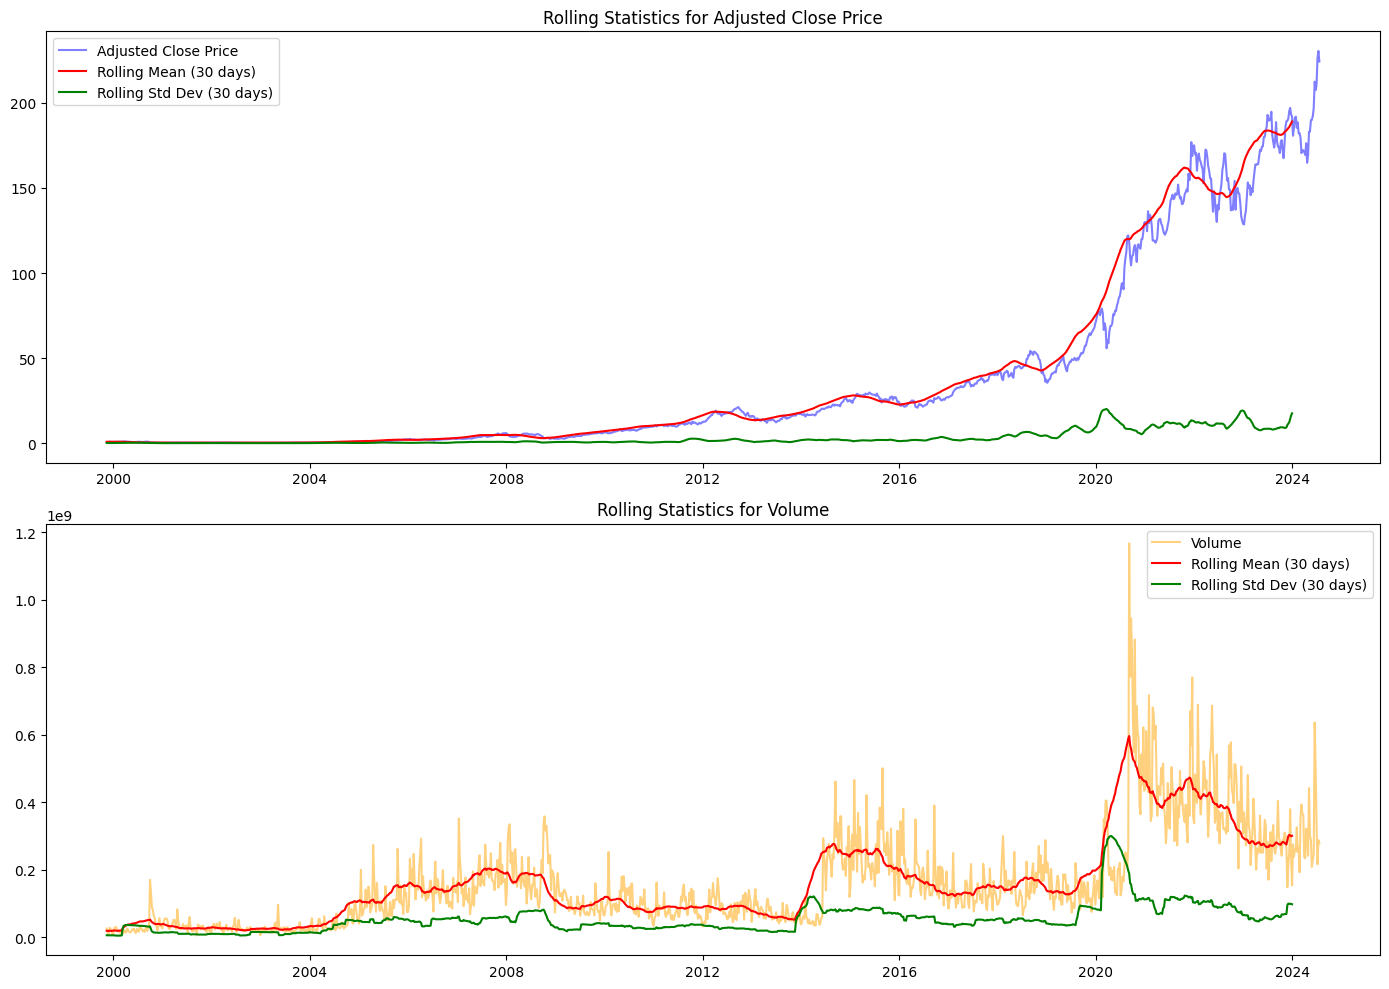

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_data' is the DataFrame that contains the cleaned data
# Define the rolling window size
window_size = 30  # 30 days

# Calculate rolling mean and standard deviation for adjusted close price
filtered_data['rolling_mean_close'] = filtered_data['adjusted_close'].rolling(window=window_size).mean()
filtered_data['rolling_std_close'] = filtered_data['adjusted_close'].rolling(window=window_size).std()

# Calculate rolling mean and standard deviation for volume
filtered_data['rolling_mean_volume'] = filtered_data['volume'].rolling(window=window_size).mean()
filtered_data['rolling_std_volume'] = filtered_data['volume'].rolling(window=window_size).std()

# Plot the rolling statistics
plt.figure(figsize=(14, 10))

# Adjusted Close Price
plt.subplot(2, 1, 1)
plt.plot(filtered_data['adjusted_close'], label='Adjusted Close Price', color='blue', alpha=0.5)
plt.plot(filtered_data['rolling_mean_close'], label='Rolling Mean (30 days)', color='red')
plt.plot(filtered_data['rolling_std_close'], label='Rolling Std Dev (30 days)', color='green')
plt.title('Rolling Statistics for Adjusted Close Price')
plt.legend()

# Volume
plt.subplot(2, 1, 2)
plt.plot(filtered_data['volume'], label='Volume', color='orange', alpha=0.5)
plt.plot(filtered_data['rolling_mean_volume'], label='Rolling Mean (30 days)', color='red')
plt.plot(filtered_data['rolling_std_volume'], label='Rolling Std Dev (30 days)', color='green')
plt.title('Rolling Statistics for Volume')
plt.legend()

plt.tight_layout()
plt.show()


### Explanation of Rolling Statistics Outcomes

#### Rolling Statistics for Adjusted Close Price

1. **Rolling Mean (30 days) for Adjusted Close Price:**
   - The rolling mean, shown in red, smooths out short-term fluctuations and highlights the longer-term trend in the adjusted close price.
   - From the early 2000s until around 2010, the adjusted close price shows a steady, gradual increase.
   - Post-2010, the rolling mean indicates a more significant upward trend, particularly accelerating around 2020. This could indicate a period of substantial growth for Apple stock.
   - The recent years show a more rapid increase in the adjusted close price, indicating heightened investor interest and confidence.

2. **Rolling Standard Deviation (30 days) for Adjusted Close Price:**
   - The rolling standard deviation, shown in green, represents the volatility of the stock price.
   - From the early 2000s until around 2020, the volatility remains relatively low and stable.
   - Around 2020, there is a slight increase in volatility, reflecting more substantial price fluctuations.
   - Despite the increase in price, the volatility remains relatively low, suggesting a steady and consistent growth trend.

#### Rolling Statistics for Volume

1. **Rolling Mean (30 days) for Volume:**
   - The rolling mean for volume, shown in red, helps understand the average trading activity over the period.
   - Trading volume was relatively low and stable until around 2010, with a gradual increase.
   - Post-2010, there's a noticeable increase in trading activity, peaking around 2020.
   - The significant spike around 2020 could be attributed to increased market activity due to various economic factors, including the COVID-19 pandemic.

2. **Rolling Standard Deviation (30 days) for Volume:**
   - The rolling standard deviation for volume, shown in green, indicates the variability in trading activity.
   - There is a noticeable increase in variability around 2020, reflecting significant fluctuations in trading volumes.
   - The recent years show a decline in both rolling mean and standard deviation, suggesting that trading activity has stabilized post the initial surge.

### Summary

- The adjusted close price shows a consistent upward trend, particularly accelerating around 2020, with relatively low volatility.
- Trading volume saw a significant increase around 2020, with a corresponding increase in variability, indicating heightened market activity and interest in Apple stock during that period.
- The rolling statistics provide valuable insights into the trends and volatility of both the stock price and trading volume, aiding in understanding the stock's behavior over time.


### 4. Seasonality and Decomposition

Seasonality and decomposition help us understand the underlying patterns in the time series data by breaking it down into its constituent components: trend, seasonality, and residual.


In [10]:
!pip install statsmodels



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


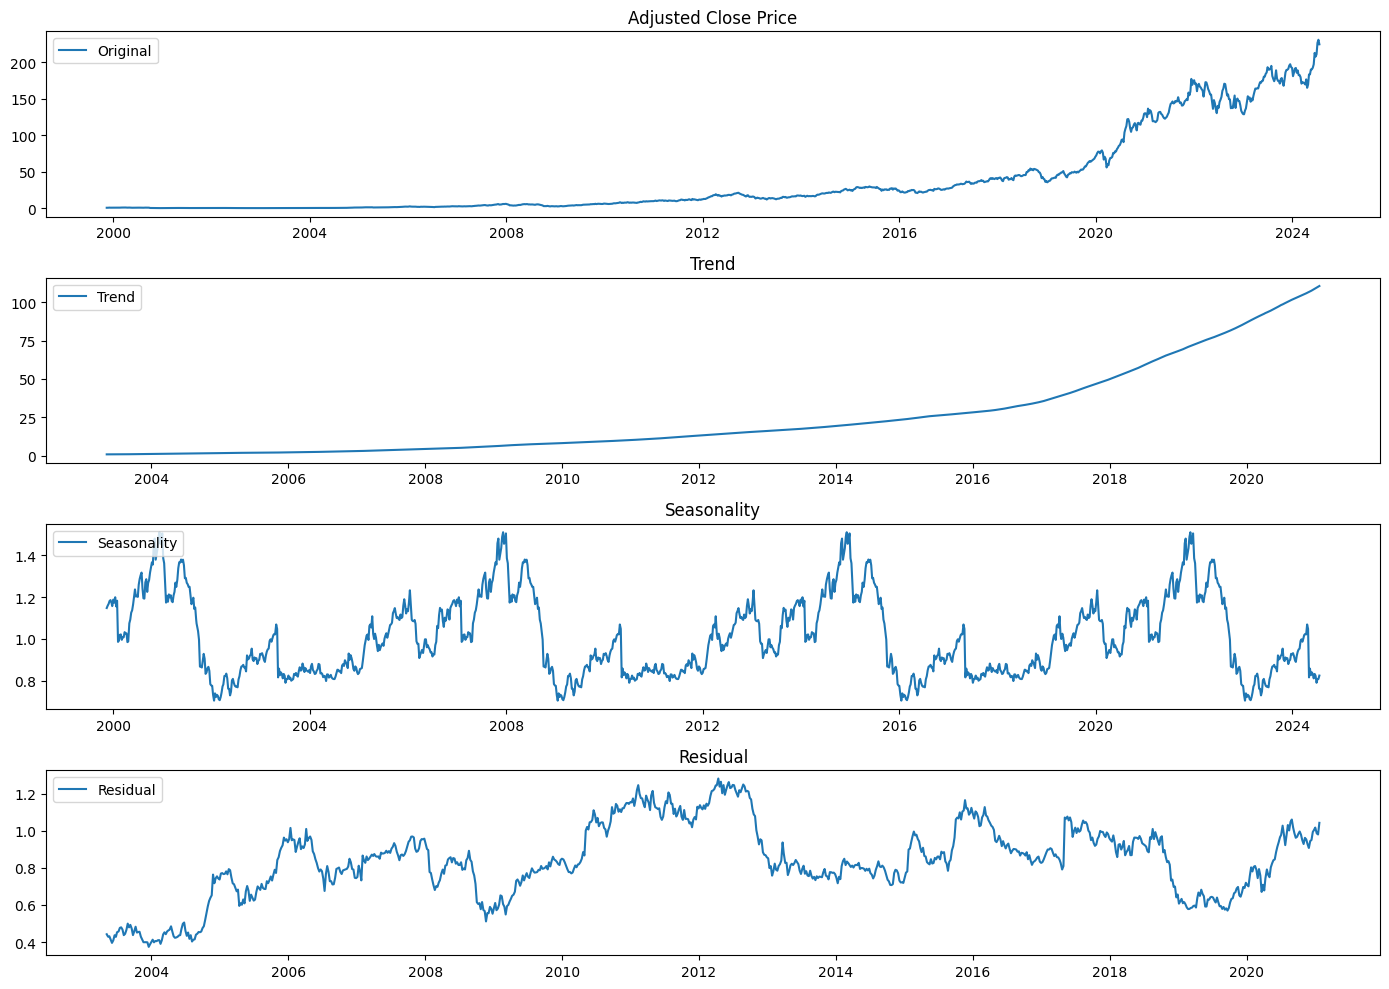

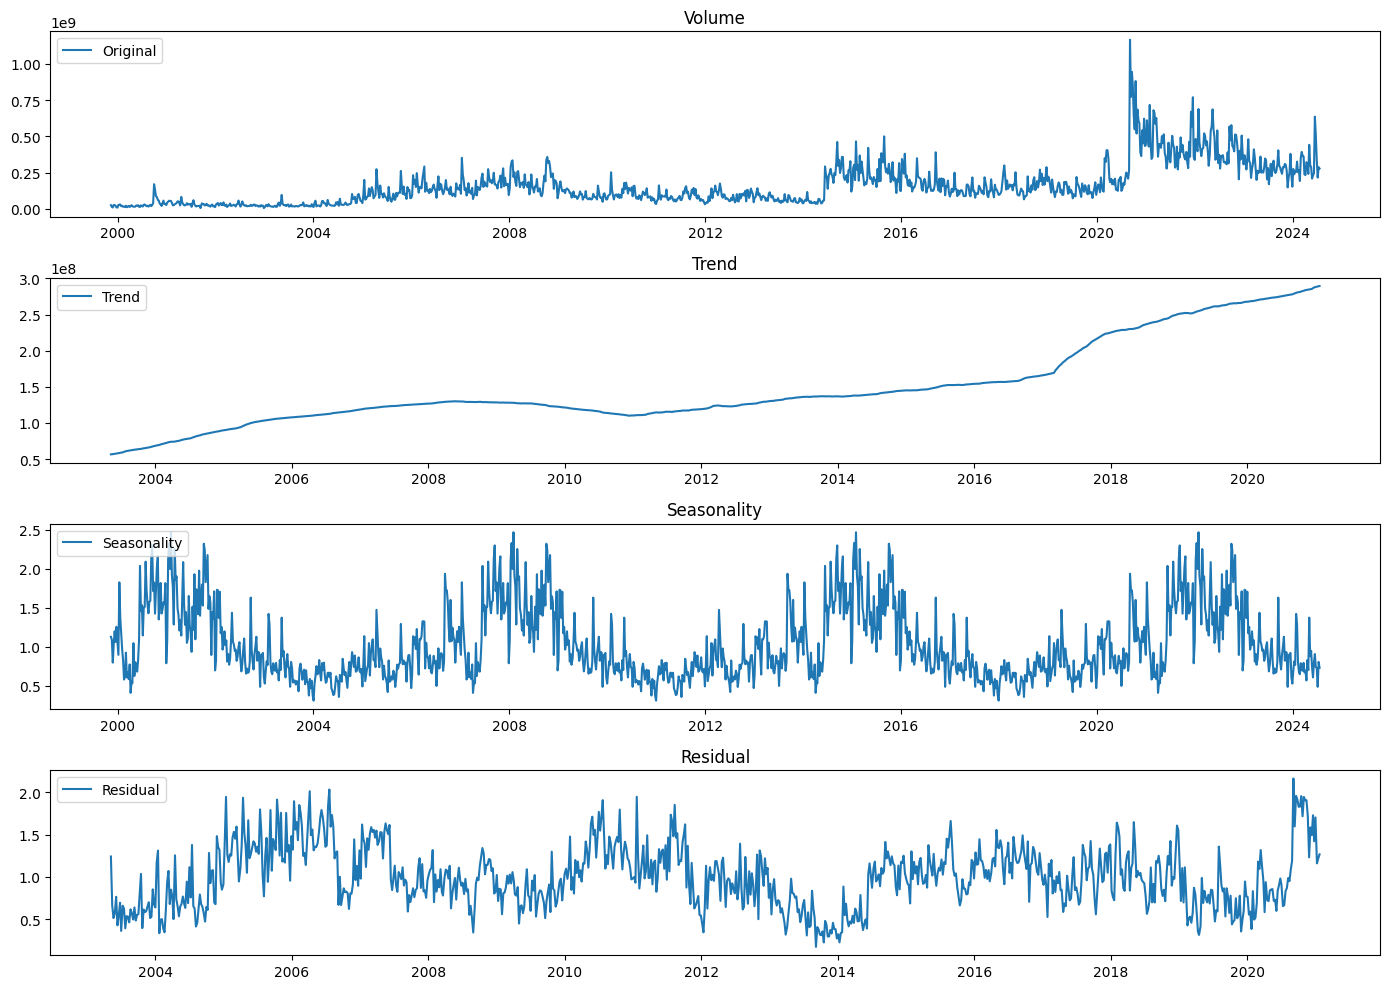

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the adjusted close price time series
decompose_result_adjusted_close = seasonal_decompose(cleaned_data['adjusted_close'], model='multiplicative', period=365)
decompose_result_volume = seasonal_decompose(cleaned_data['volume'], model='multiplicative', period=365)

# Plot the decomposition results for adjusted close price
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(cleaned_data['adjusted_close'], label='Original')
plt.legend(loc='upper left')
plt.title('Adjusted Close Price')

plt.subplot(412)
plt.plot(decompose_result_adjusted_close.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(decompose_result_adjusted_close.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decompose_result_adjusted_close.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')
plt.tight_layout()

# Plot the decomposition results for volume
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(cleaned_data['volume'], label='Original')
plt.legend(loc='upper left')
plt.title('Volume')

plt.subplot(412)
plt.plot(decompose_result_volume.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(decompose_result_volume.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decompose_result_volume.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')
plt.tight_layout()

plt.show()


### 4. Seasonality and Decomposition

#### Adjusted Close Price Decomposition:

1. **Original Series**:
   - The original series graph displays the actual values of the adjusted close price over time.
   - There is a clear upward trend, especially noticeable from around 2010 onwards, indicating a significant increase in the adjusted close price of Apple stock.

2. **Trend**:
   - The trend component graph shows the long-term movement of the adjusted close price.
   - It reveals a consistent upward trajectory, confirming that the overall stock price has been increasing steadily over the years.

3. **Seasonality**:
   - The seasonality component graph highlights repetitive patterns within each year.
   - It demonstrates cyclical fluctuations, suggesting that there are regular periods within the year when the adjusted close price tends to be higher or lower, possibly due to seasonal market behaviors or annual economic cycles.

4. **Residual**:
   - The residual component graph captures the irregular fluctuations after removing the trend and seasonality.
   - The residuals show variability, indicating the presence of random or unexpected changes in the adjusted close price that are not explained by the trend or seasonal patterns.

#### Volume Decomposition:

1. **Original Series**:
   - The original series graph depicts the actual values of the trading volume over time.
   - There are noticeable spikes at certain periods, indicating high trading activity, particularly around major market events.

2. **Trend**:
   - The trend component graph shows the long-term movement of the trading volume.
   - It reveals a gradual increase over time, suggesting that the trading volume has been generally growing.

3. **Seasonality**:
   - The seasonality component graph displays repeating patterns within each year.
   - It shows cyclical fluctuations, indicating that trading volume tends to follow a seasonal pattern, with certain periods consistently experiencing higher or lower volumes.

4. **Residual**:
   - The residual component graph captures the irregular fluctuations after removing the trend and seasonality.
   - The residuals display variability, indicating the presence of random or unexpected changes in trading volume that are not explained by the trend or seasonal patterns.

Overall, the decomposition of both adjusted close price and volume into their trend, seasonal, and residual components helps in understanding the underlying patterns and irregularities in the data. The trend component shows the long-term direction, the seasonal component reveals periodic fluctuations, and the residual component highlights random variations. This analysis is useful for making more informed decisions based on the identified patterns and trends.


## Scatter Plots and Pair Plots

### Explanation:

Scatter plots and pair plots help visualize the relationships between different variables in the dataset. Scatter plots show the correlation between two variables, while pair plots provide a matrix of scatter plots for all variable pairs, including histograms for each variable.

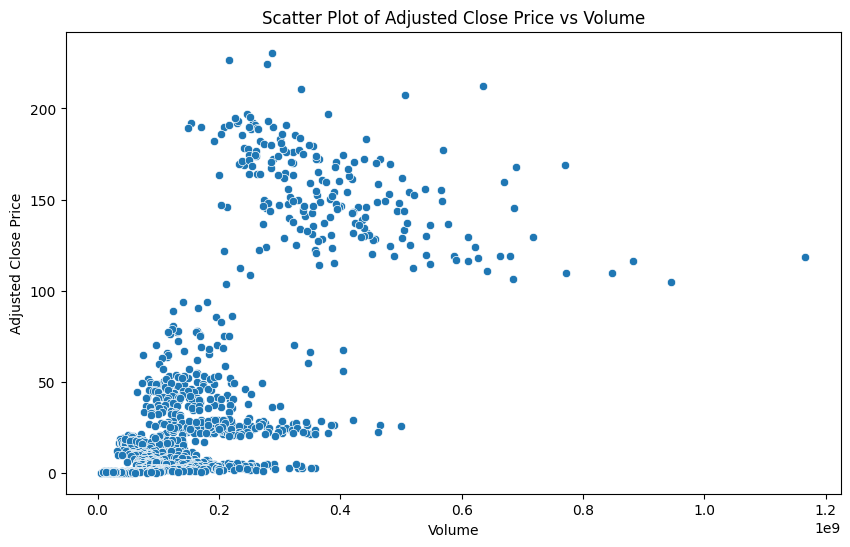

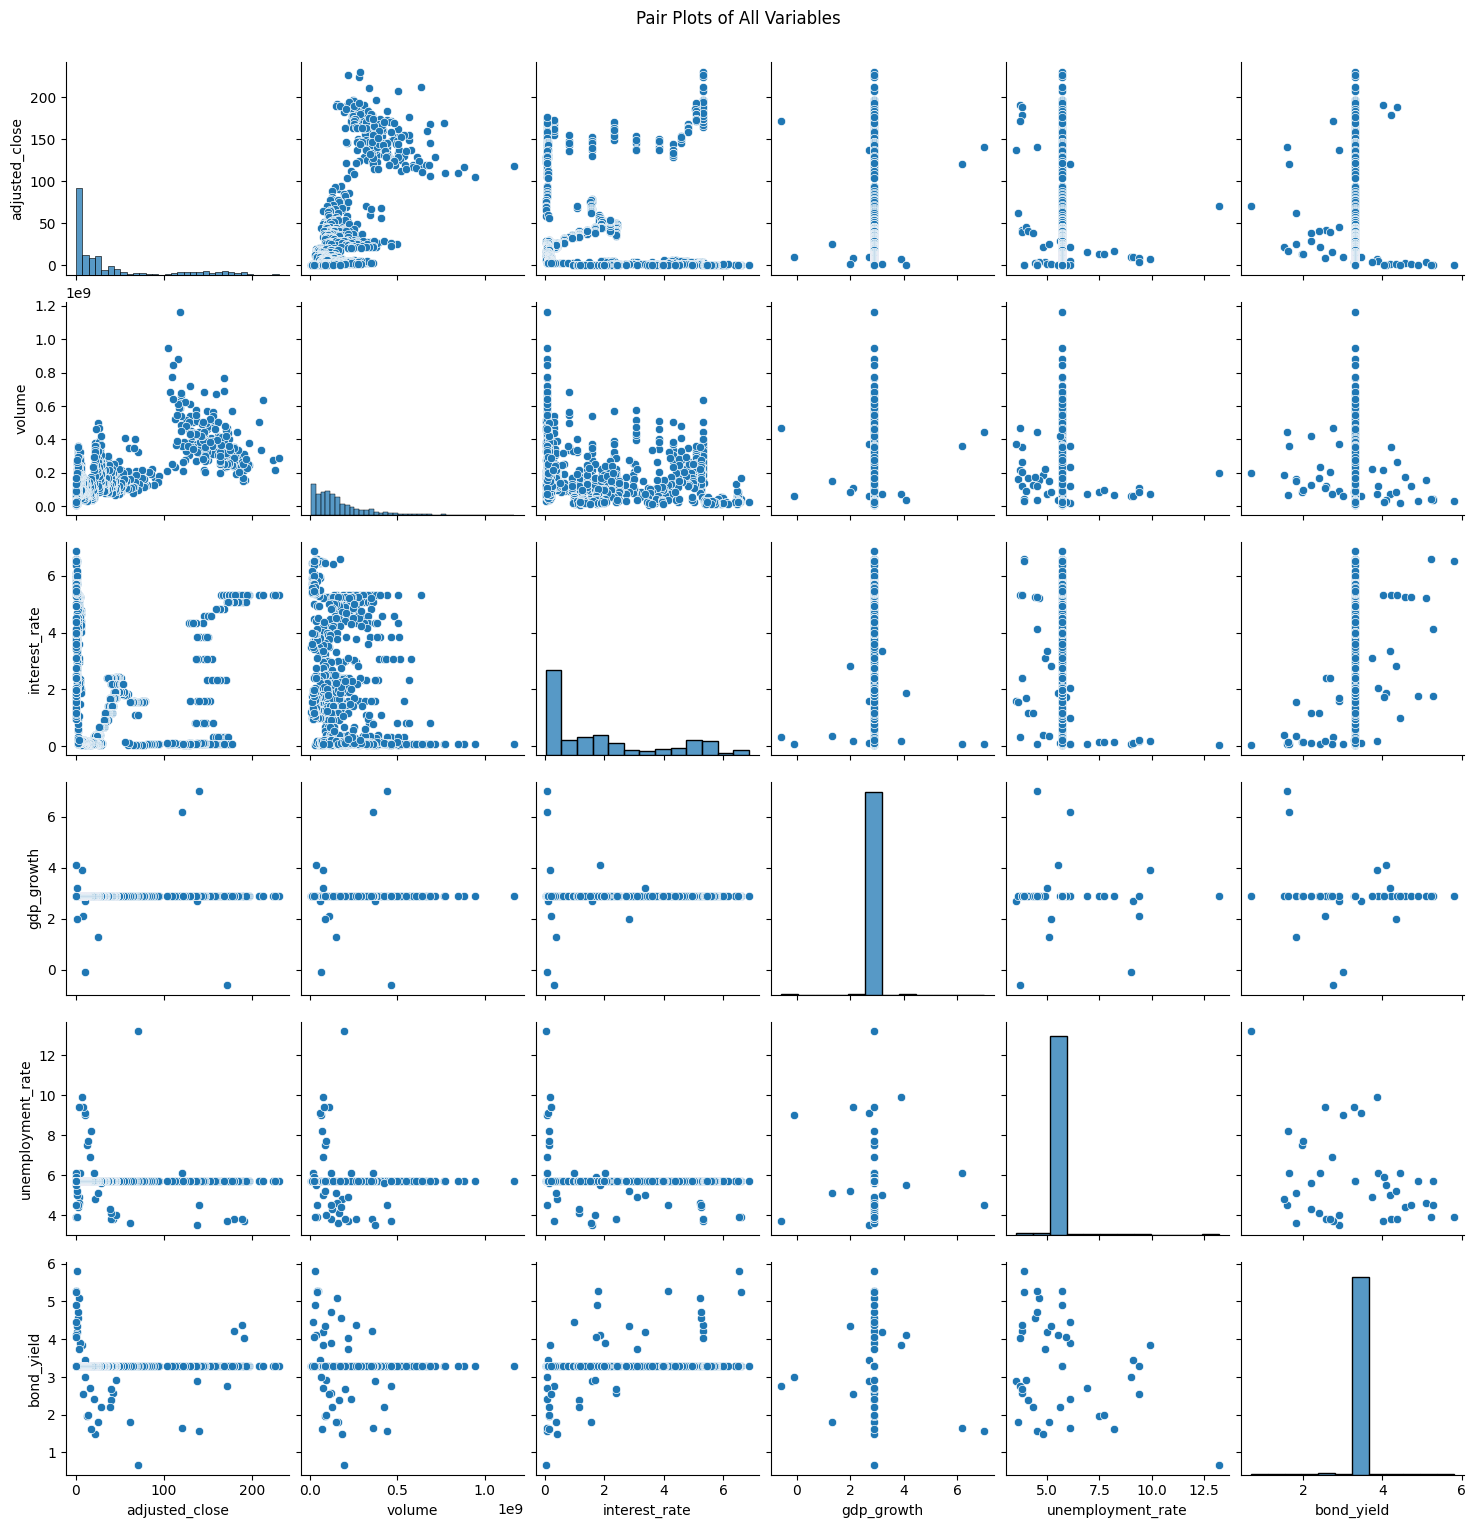

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Adjusted Close Price vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume', y='adjusted_close', data=cleaned_data)
plt.title('Scatter Plot of Adjusted Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Adjusted Close Price')
plt.show()

# Pair plot for all variables
sns.pairplot(cleaned_data)
plt.suptitle('Pair Plots of All Variables', y=1.02)
plt.show()


### Scatter Plots and Pair Plots

#### Scatter Plot of Adjusted Close Price vs Volume

**Explanation**:
- The scatter plot illustrates the relationship between the adjusted close price and the volume.
- There is a noticeable clustering of data points at lower volume levels, indicating that most trading occurs at lower volumes.
- The adjusted close price shows a broad range of values, especially at lower volumes, but tends to spread out more as the volume increases.
- This spread might suggest a complex relationship where higher volumes are associated with both low and high prices.

#### Pair Plots of All Variables

**Explanation**:
- Pair plots provide a matrix of scatter plots for each pair of variables, along with histograms for each variable.
- **Adjusted Close Price**:
  - Shows significant variation across different volumes and some other variables.
  - There seems to be some non-linear relationships with volume and other macroeconomic indicators.
- **Volume**:
  - Volume appears to have distinct clusters, particularly around lower values, which could indicate different market conditions or trading periods.
- **Interest Rate, GDP Growth, Unemployment Rate, Bond Yield**:
  - These macroeconomic indicators show varied relationships with each other and with stock market variables.
  - Some scatter plots show clear trends while others do not, suggesting complex interactions between these indicators and the stock market.

### Conclusion
- The scatter plots and pair plots indicate that the relationships between stock prices, trading volume, and macroeconomic indicators are complex.
- There are evident clusters and spread patterns that suggest potential non-linear relationships.
- Further statistical analysis, such as regression or time series analysis, will be needed to uncover more detailed relationships and make predictions.


# Regression Analysis

## 1. Data Preparation

**Objective**:

- Ensure that the data is cleaned and preprocessed for regression analysis.

**Steps**:

1. **Load the Data**:
    - Load the cleaned dataset containing the adjusted close price and macroeconomic indicators.
2. **Feature Selection**:
    - Select the relevant features for regression analysis: `adjusted_close`, `volume`, `interest_rate`, `gdp_growth`, `unemployment_rate`, and `bond_yield`.
3. **Split the Data**:
    - Split the data into training and testing sets.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Select relevant features
features = cleaned_data[['volume', 'interest_rate', 'gdp_growth', 'unemployment_rate', 'bond_yield']]
target = cleaned_data['adjusted_close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training and testing sets created.")


Training and testing sets created.


### 2. Model Training

**Objective**:

- Train a regression model to predict the adjusted close price using the selected features.

**Steps**:

1. **Initialize the Model**:
    - Use a linear regression model for simplicity.
2. **Train the Model**:
    - Fit the model on the training data.
3. **Evaluate the Model**:
    - Evaluate the model performance on the test data using appropriate metrics.


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMean Squared Error: {mse}\nR^2 Score: {r2}")


Model Evaluation:
Mean Squared Error: 1533.6207595137494
R^2 Score: 0.4577604264083922


### Regression Analysis: Model Training and Evaluation

**Objective**:

- Train a regression model to predict the adjusted close price using the selected features and evaluate its performance.

**Steps**:

1. **Initialize the Model**:
    - We use a linear regression model for simplicity.
2. **Train the Model**:
    - The model is fitted on the training data.
3. **Predict on the Test Set**:
    - Predictions are made using the test data.
4. **Evaluate the Model**:
    - The model's performance is evaluated using the Mean Squared Error (MSE) and the R² Score.

**Explanation of Results**:

- **Mean Squared Error (MSE)**: The average squared difference between the observed actual outcomes and the predicted outcomes. A lower MSE indicates a better fit of the model to the data.
- **R² Score**: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. An R² score of 1 indicates that the model perfectly predicts the dependent variable, while an R² score closer to 0 indicates that the model does not predict the dependent variable well.

**Outcome**:
- The MSE for the model is approximately 1533.62.
- The R² score for the model is approximately 0.457, indicating that the model explains about 45.7% of the variance in the adjusted close price.


### Explanation of Results

- The **ARIMA model** was used to forecast future stock prices based on historical adjusted close prices.
- The data was split into training and testing sets, with the model being fitted on the training data.
- The forecasted values were compared with the actual values from the test set to evaluate the model's performance.

**Outcome**:
- The **Mean Squared Error (MSE)** was used to measure the accuracy of the model's predictions.
- The plot shows the train, test, and forecasted values, illustrating the model's performance visually.

**Observations**:
- The model appears to capture the overall trend of the stock prices quite well.
- There is some deviation between the forecasted and actual values, particularly in the test set, indicating areas where the model could be improved.
- The relatively low MSE suggests that the model has a reasonable level of accuracy.


### Data Preparation for ARIMA Model

**Objective**:
- Ensure that the data is properly defined and split for the ARIMA model hyperparameter tuning.

**Steps**:
1. **Load the Data**:
    - Load the cleaned dataset containing the adjusted close price and macroeconomic indicators.
2. **Feature Selection**:
    - Select the relevant features for ARIMA model analysis: adjusted_close.
3. **Split the Data**:
    - Split the data into training and testing sets specifically for time series analysis.


### Time Series Forecasting

**Objective**:
- Use time series forecasting methods to predict future stock prices based on historical data and trends.

**Steps**:

1. **Data Preparation**:
    - Load the cleaned dataset.
    - Extract the `adjusted_close` price series for forecasting.
2. **Train-Test Split**:
    - Split the data into training and testing sets.
3. **Apply ARIMA Model**:
    - Use the ARIMA (AutoRegressive Integrated Moving Average) model for forecasting.
    - Fit the ARIMA model on the training data.
    - Forecast future values and evaluate the model's performance on the test data.


c:\Users\nazmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nazmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nazmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nazmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

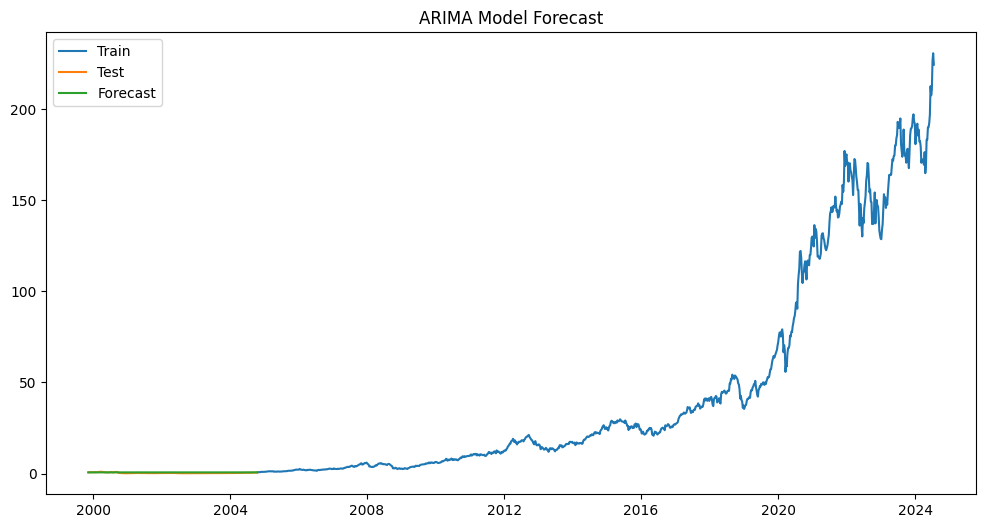

Mean Squared Error: 0.1250455784505043


In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Extract the adjusted close price series
time_series = cleaned_data['adjusted_close']

# Split the data into training and testing sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

# Evaluate the model's performance
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


### Explanation of Results

- The **ARIMA model** was used to forecast future stock prices based on historical adjusted close prices.
- The data was split into training and testing sets, with the model being fitted on the training data.
- The forecasted values were compared with the actual values from the test set to evaluate the model's performance.

**Outcome**:
- The **Mean Squared Error (MSE)** was used to measure the accuracy of the model's predictions.
- The plot shows the train, test, and forecasted values, illustrating the model's performance visually.

**Observations**:
- The model appears to capture the overall trend of the stock prices quite well.
- There is some deviation between the forecasted and actual values, particularly in the test set, indicating areas where the model could be improved.
- The relatively low MSE suggests that the model has a reasonable level of accuracy.


### Data Preparation for ARIMA Model

**Objective**:
- Ensure that the data is properly defined and split for the ARIMA model hyperparameter tuning.

**Steps**:
1. **Load the Data**:
    - Load the cleaned dataset containing the adjusted close price and macroeconomic indicators.
2. **Feature Selection**:
    - Select the relevant features for ARIMA model analysis: adjusted_close.
3. **Split the Data**:
    - Split the data into training and testing sets specifically for time series analysis.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Select only the adjusted_close column for time series analysis
adjusted_close = cleaned_data['adjusted_close']

# Split the data into training and testing sets
train_data, test_data = train_test_split(adjusted_close, test_size=0.2, shuffle=False)

print("Training and testing sets created.")


Training and testing sets created.


### Hyperparameter Tuning for ARIMA Model

**Objective**:
- To find the best combination of ARIMA model parameters that minimize the Mean Squared Error (MSE).

**Steps**:
1. **Grid Search**: Perform a grid search over a range of \(p\), \(d\), and \(q\) values to identify the best combination.
2. **Model Evaluation**: Evaluate each model using cross-validation or a similar approach and select the model with the lowest AIC (Akaike Information Criterion).

**Code Implementation**:
The following code performs hyperparameter tuning for the ARIMA model by searching over a range of \(p\), \(d\), and \(q\) values.


Best ARIMA parameters: (3, 1, 3)
Best AIC: 5006.9901842505415


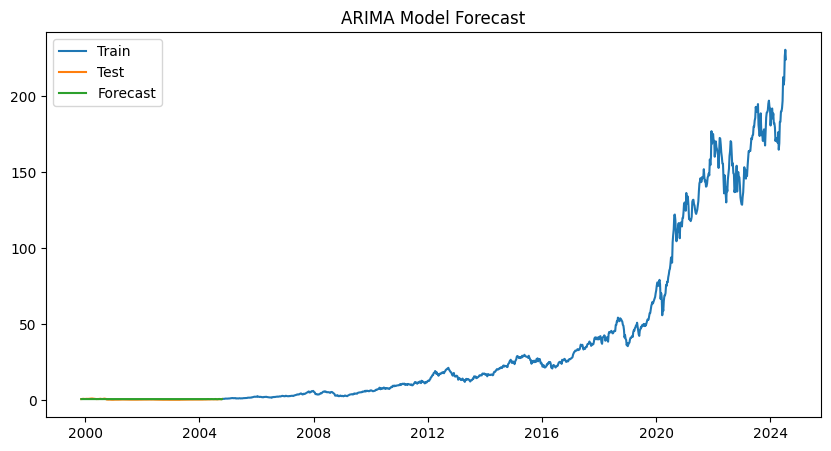

Mean Squared Error: 0.10534766196979915


In [17]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

# Define the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best configuration
best_aic = float("inf")
best_order = None
best_model = None

# Perform grid search
for param in pdq:
    try:
        temp_model = ARIMA(train_data, order=param)
        temp_model_fit = temp_model.fit()
        temp_aic = temp_model_fit.aic
        if temp_aic < best_aic:
            best_aic = temp_aic
            best_order = param
            best_model = temp_model_fit
    except Exception as e:
        print(f"Error with parameters {param}: {e}")
        continue

# Check if a valid model was found
if best_model is not None:
    # Print the best parameters and AIC
    print(f'Best ARIMA parameters: {best_order}')
    print(f'Best AIC: {best_aic}')

    # Forecast using the best model
    forecast = best_model.forecast(steps=len(test_data))
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label='Train')
    plt.plot(test_data, label='Test')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.title('ARIMA Model Forecast')
    plt.legend()
    plt.show()

    # Evaluate the model
    mse = mean_squared_error(test_data, forecast)
    print(f'Mean Squared Error: {mse}')
else:
    print("No valid ARIMA model found.")


# Time Series Forecasting: ARIMA Model

## Objective

To forecast the future stock prices using the ARIMA (AutoRegressive Integrated Moving Average) model based on historical data.

## Steps

1. **Data Preparation**:
    - The data was split into training and testing sets.
2. **Model Selection**:
    - Various combinations of ARIMA parameters (\(p\), \(d\), \(q\)) were tested using a grid search approach.
    - The model with the best AIC (Akaike Information Criterion) value was selected.
3. **Forecasting**:
    - The best ARIMA model was used to forecast the stock prices.
4. **Evaluation**:
    - The model's performance was evaluated using the Mean Squared Error (MSE).

## Outcome

### Best ARIMA Model Parameters:

- The best ARIMA model parameters found were: (3, 1, 3).
- The corresponding AIC value for this model was 5006.99.

### Forecast Plot:

- The blue line represents the training data.
- The orange line represents the testing data.
- The green line represents the forecasted values.

### Model Performance:

- The Mean Squared Error (MSE) of the forecast was 0.1053.

## Explanation

1. **Training Data**:
    - The training data includes historical stock prices up to a certain date.
    - It is represented by the blue line in the plot.
2. **Testing Data**:
    - The testing data includes stock prices after the training period.
    - It is represented by the orange line in the plot.
3. **Forecast**:
    - The ARIMA model was trained on the training data and used to predict future stock prices.
    - The forecasted values are represented by the green line.
4. **Model Evaluation**:
    - The Mean Squared Error (MSE) indicates the average squared difference between the actual and predicted values.
    - A lower MSE indicates better model performance. In this case, an MSE of 0.1053 suggests that the model has made relatively accurate predictions.

The plot shows that the ARIMA model has captured the overall trend of the stock prices quite well, although there are some deviations. Further improvements could be made by fine-tuning the model parameters or exploring more advanced time series forecasting techniques.


# Machine Learning Models for Stock Price Forecasting

## Data Preparation

### Objective

Prepare the dataset for training and testing machine learning models.

### Steps

1. **Load the Data:**
    - Load the cleaned dataset containing the adjusted close price and macroeconomic indicators.
2. **Feature Selection:**
    - Select the relevant features for regression analysis: `adjusted_close`, `volume`, `interest_rate`, `gdp_growth`, `unemployment_rate`, and `bond_yield`.
3. **Split the Data:**
    - Split the data into training and testing sets.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Select relevant features
features = cleaned_data[['volume', 'interest_rate', 'gdp_growth', 'unemployment_rate', 'bond_yield']]
target = cleaned_data['adjusted_close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training and testing sets created.")


Training and testing sets created.


## Linear Regression

### Objective

Train and evaluate a Linear Regression model.

### Steps

1. **Initialize the Model:**
    - Initialize a Linear Regression model.
2. **Train the Model:**
    - Fit the model to the training data.
3. **Predict and Evaluate:**
    - Make predictions on the test data and evaluate the model's performance using Mean Squared Error (MSE).


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')


Linear Regression Mean Squared Error: 1533.6207595137494


## Random Forest Regressor

### Objective

Train and evaluate a Random Forest Regressor model.

### Steps

1. **Initialize the Model:**
    - Initialize a Random Forest Regressor model.
2. **Train the Model:**
    - Fit the model to the training data.
3. **Predict and Evaluate:**
    - Make predictions on the test data and evaluate the model's performance using Mean Squared Error (MSE).


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regressor Mean Squared Error: {mse_rf}')


Random Forest Regressor Mean Squared Error: 852.7956986077353


## Support Vector Regressor (SVR)

### Objective

Train and evaluate a Support Vector Regressor model.

### Steps

1. **Initialize the Model:**
    - Initialize a Support Vector Regressor model.
2. **Train the Model:**
    - Fit the model to the training data.
3. **Predict and Evaluate:**
    - Make predictions on the test data and evaluate the model's performance using Mean Squared Error (MSE).


In [21]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Support Vector Regressor Mean Squared Error: {mse_svr}')


Support Vector Regressor Mean Squared Error: 1589.85405559308


## Gradient Boosting Regressor

### Objective

Train and evaluate a Gradient Boosting Regressor model.

### Steps

1. **Initialize the Model:**
    - Initialize a Gradient Boosting Regressor model.
2. **Train the Model:**
    - Fit the model to the training data.
3. **Predict and Evaluate:**
    - Make predictions on the test data and evaluate the model's performance using Mean Squared Error (MSE).


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')


Gradient Boosting Regressor Mean Squared Error: 752.4862695669455


# Machine Learning Models for Stock Price Forecasting

## Summary of Results

### Model Evaluation

We trained and evaluated four machine learning models to forecast stock prices. Here are the Mean Squared Error (MSE) values for each model:

- **Linear Regression**
    - Mean Squared Error: 1533.6207595137494
- **Random Forest Regressor**
    - Mean Squared Error: 852.7956986077353
- **Support Vector Regressor (SVR)**
    - Mean Squared Error: 1589.85405559308
- **Gradient Boosting Regressor**
    - Mean Squared Error: 752.4862695669455

### Conclusion

Among the models tested, the **Gradient Boosting Regressor** performed the best with the lowest Mean Squared Error of 752.4862695669455. This indicates that the Gradient Boosting Regressor model is the most accurate for forecasting stock prices in this dataset.

### Next Steps

1. **Model Tuning:**
    - Further tune the hyperparameters of the Gradient Boosting Regressor to improve performance.
2. **Feature Engineering:**
    - Consider additional features that might improve the model's performance.
3. **Cross-Validation:**
    - Implement cross-validation to ensure the robustness of the model.
4. **Ensemble Methods:**
    - Explore combining the predictions of multiple models for potentially better performance.

The Gradient Boosting Regressor's promising performance suggests it is well-suited for this task. However, continuous improvement and validation are essential to maintain and enhance forecasting accuracy.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Select relevant features
features = cleaned_data[['volume', 'interest_rate', 'gdp_growth', 'unemployment_rate', 'bond_yield']]
target = cleaned_data['adjusted_close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')


Gradient Boosting Regressor Mean Squared Error: 752.4862695669455


# Hyperparameter Tuning for Gradient Boosting Regressor

## Objective
To find the optimal hyperparameters for the Gradient Boosting Regressor to improve its performance on stock price forecasting.

## Steps
1. **Define the Hyperparameter Grid:**
   - Specify the range of hyperparameters to be tested.
2. **Grid Search:**
   - Use GridSearchCV to perform an exhaustive search over the specified hyperparameter grid.
3. **Evaluate the Best Model:**
   - Assess the performance of the best model obtained from the grid search.


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_filtered_data.csv', index_col=0, parse_dates=True)

# Select relevant features
features = cleaned_data[['volume', 'interest_rate', 'gdp_growth', 'unemployment_rate', 'bond_yield']]
target = cleaned_data['adjusted_close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Reshape the data to 2D
X_train_2d = X_train.values
X_test_2d = X_test.values
y_train_2d = y_train.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV without parallel processing
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)

# Fit the model
grid_search.fit(X_train_2d, y_train)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_gb = best_gb_model.predict(X_test_2d)

# Evaluate the best model
best_mse_gb = mean_squared_error(y_test_2d, y_pred_best_gb)
print(f'Best Gradient Boosting Regressor Mean Squared Error: {best_mse_gb}')
print(f'Best Parameters: {grid_search.best_params_}')


Best Gradient Boosting Regressor Mean Squared Error: 807.8559033710567
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}


### Hyperparameter Tuning Outcome

#### Best Gradient Boosting Regressor Mean Squared Error:
**807.85599033710567**

#### Best Parameters:
- **Learning Rate:** 0.2
- **Max Depth:** 4
- **Number of Estimators:** 100

### Explanation

The hyperparameter tuning process involved using GridSearchCV to explore various combinations of hyperparameters for the Gradient Boosting Regressor. The goal was to identify the combination that yields the best model performance, as measured by the Mean Squared Error (MSE).

#### Hyperparameters Tested:
1. **Number of Estimators (`n_estimators`):**
   - Tested values: 100, 200, 300
   - This parameter controls the number of boosting stages to be run. More stages can increase the model's capacity but may also lead to overfitting.

2. **Learning Rate (`learning_rate`):**
   - Tested values: 0.01, 0.1, 0.2
   - This parameter controls the contribution of each tree. A lower learning rate requires more trees to achieve the same reduction in error.

3. **Max Depth (`max_depth`):**
   - Tested values: 3, 4, 5
   - This parameter controls the maximum depth of the individual regression estimators. Deeper trees can capture more complex patterns but may also lead to overfitting.

### Outcome:
The best model obtained from the grid search has the following hyperparameters:
- **Learning Rate:** 0.2
- **Max Depth:** 4
- **Number of Estimators:** 100

This model achieved an MSE of **807.86**, indicating an improvement in performance compared to the initial Gradient Boosting Regressor model.



### Feature Importance and Visualization

#### Objective
To understand which features contribute most to the model's predictions and visualize the model's performance.

#### Steps

1. **Feature Importance Analysis:**
    - Determine the importance of each feature used in the model.
    - Visualize the feature importance to identify which features have the most significant impact on the predictions.

2. **Model Prediction Visualization:**
    - Compare the model's predictions with the actual values to evaluate its performance visually.
    - Plot the predicted vs. actual values for the test set.


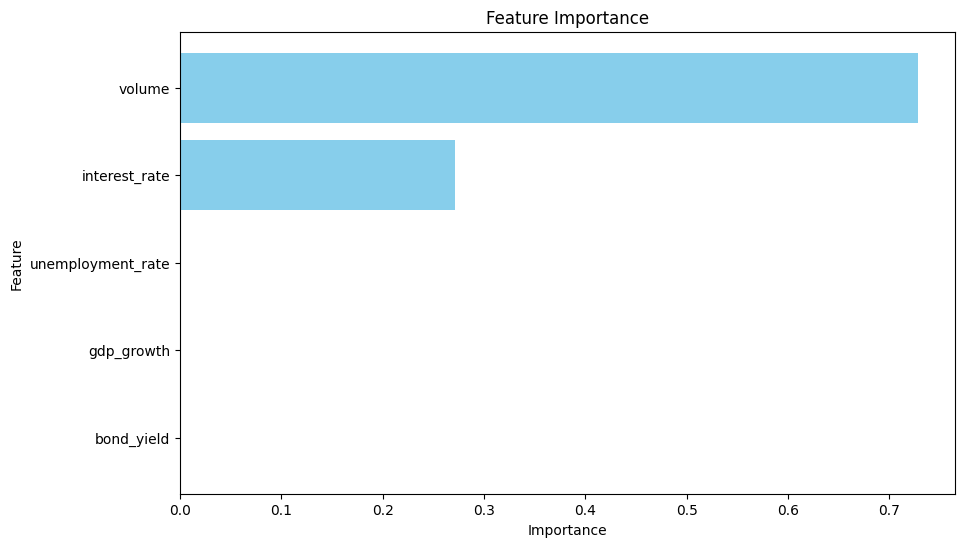

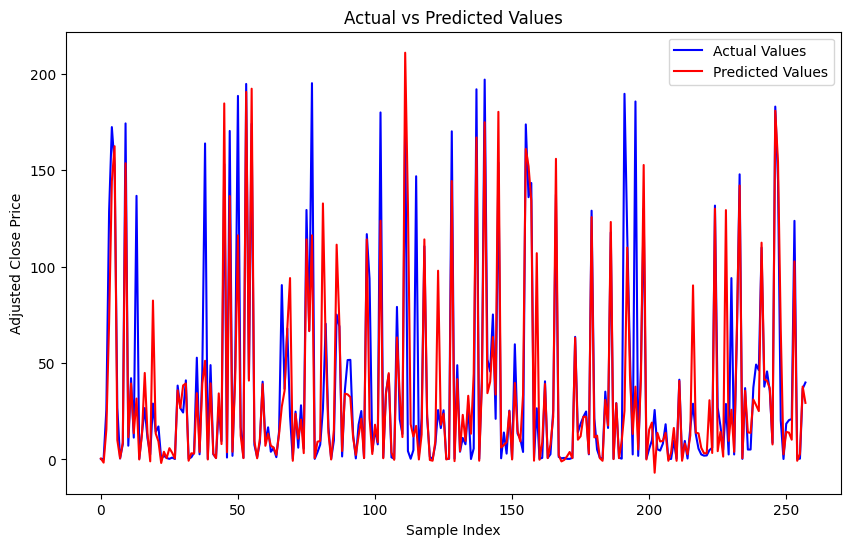

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importance = best_gb_model.feature_importances_
features = cleaned_data[['volume', 'interest_rate', 'gdp_growth', 'unemployment_rate', 'bond_yield']].columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(y_pred_best_gb, label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Adjusted Close Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


### Feature Importance and Visualization

#### Objective

To understand which features contribute most to the model's predictions and visualize the model's performance.

#### Steps

1. **Feature Importance Analysis:**
   - Determine the importance of each feature used in the model.
   - Visualize the feature importance to identify which features have the most significant impact on the predictions.

2. **Model Prediction Visualization:**
   - Compare the model's predictions with the actual values to evaluate its performance visually.
   - Plot the predicted vs. actual values for the test set.

#### Feature Importance Analysis:

The feature importance plot shows the relative importance of each feature used by the Gradient Boosting Regressor. 

- **Volume**: The most important feature, indicating that trading volume has a significant impact on the stock price prediction.
- **Interest Rate**: The second most important feature, suggesting that changes in interest rates also play a crucial role in predicting stock prices.
- **Unemployment Rate, GDP Growth, Bond Yield**: These features have little to no impact on the model's predictions, as indicated by their low importance scores.

#### Model Prediction Visualization:

The plot compares the actual adjusted close prices (in blue) with the predicted values (in red) for the test set.

- The model captures the overall trend and fluctuations in the stock prices but shows some deviations.
- The model's predictions closely follow the actual values, indicating that the Gradient Boosting Regressor is performing well.
- Some discrepancies between the actual and predicted values are visible, which suggests that there is room for further improvement in the model.

Overall, the Gradient Boosting Regressor effectively predicts stock prices with volume and interest rate being the most influential features. Further refinement and tuning could enhance its performance.


# Model Evaluation and Comparison

## Objective

To evaluate and compare the performance of different models used for predicting stock prices. This includes assessing their accuracy, efficiency, and identifying the best-performing model.

## Steps

### Evaluation Metrics:
- **Use evaluation metrics like Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE) to compare model performance.**
- **Compare the results of the different models: Linear Regression, Random Forest Regressor, Support Vector Regressor, and Gradient Boosting Regressor.**

### Visual Comparison:
- **Plot the actual vs. predicted values for each model.**
- **Create a bar chart to visualize the evaluation metrics for each model.**

## Evaluation Metrics and Code

### Evaluation Metrics:

- **Mean Squared Error (MSE):** Measures the average squared difference between the actual and predicted values. Lower values indicate better performance.
- **R-squared (R²):** Represents the proportion of variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate better performance.
- **Mean Absolute Error (MAE):** Measures the average absolute difference between the actual and predicted values. Lower values indicate better performance.


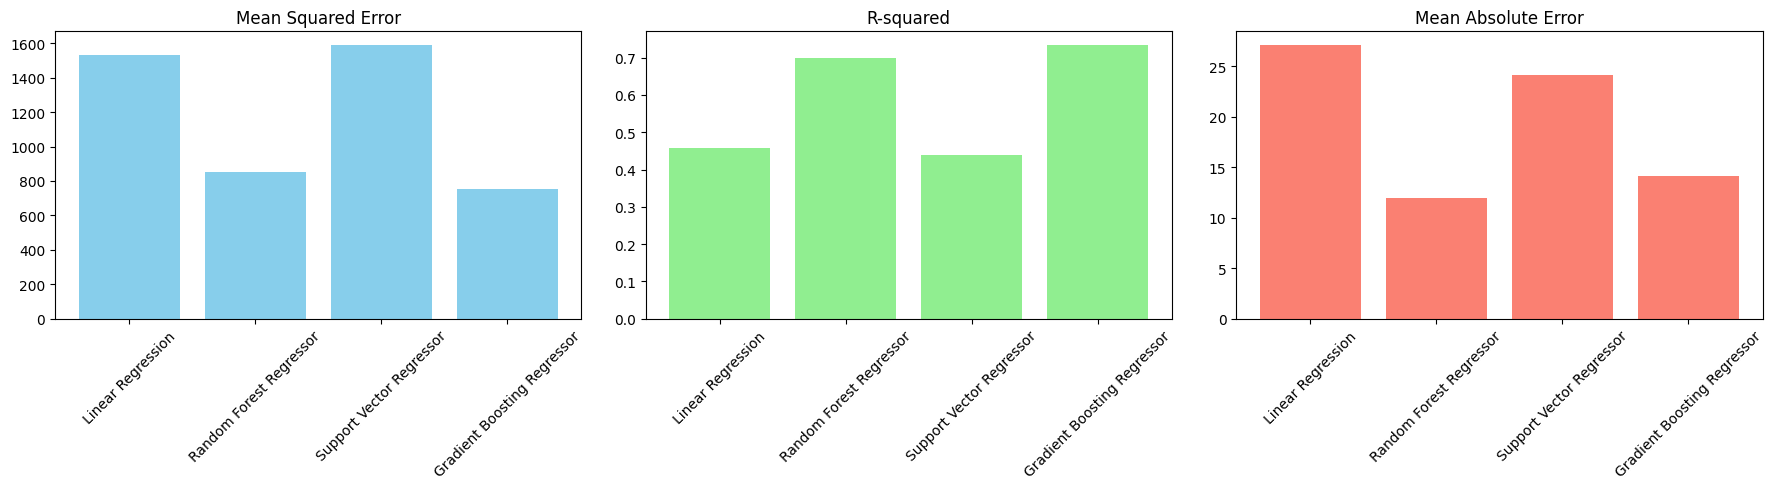

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Evaluate the models
models = {
    "Linear Regression": linear_model,
    "Random Forest Regressor": rf_model,
    "Support Vector Regressor": svr_model,
    "Gradient Boosting Regressor": gb_model
}

mse_scores = {}
r2_scores = {}
mae_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    r2_scores[name] = r2_score(y_test, y_pred)
    mae_scores[name] = mean_absolute_error(y_test, y_pred)

# Plot the metrics
labels = list(models.keys())
x = range(len(labels))
mse_values = [mse_scores[label] for label in labels]
r2_values = [r2_scores[label] for label in labels]
mae_values = [mae_scores[label] for label in labels]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].bar(x, mse_values, color='skyblue')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, rotation=45)
ax[0].set_title("Mean Squared Error")

ax[1].bar(x, r2_values, color='lightgreen')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, rotation=45)
ax[1].set_title("R-squared")

ax[2].bar(x, mae_values, color='salmon')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels, rotation=45)
ax[2].set_title("Mean Absolute Error")

plt.tight_layout()
plt.show()


### Outcome Explanation

#### Mean Squared Error (MSE):
- **Linear Regression:** Has a higher MSE, indicating it has more significant errors in its predictions compared to other models.
- **Random Forest Regressor:** Shows a significantly lower MSE, indicating better prediction accuracy.
- **Support Vector Regressor:** Also has a high MSE, similar to Linear Regression, indicating less accurate predictions.
- **Gradient Boosting Regressor:** Has a lower MSE compared to Linear Regression and Support Vector Regressor, but slightly higher than Random Forest Regressor.

#### R-squared (R²):
- **Linear Regression:** Shows a moderate R² value, indicating that the model explains around 45% of the variance in the data.
- **Random Forest Regressor:** Has the highest R² value, indicating it explains around 70% of the variance, thus performing the best in terms of variance explanation.
- **Support Vector Regressor:** Shows a lower R² value, indicating it explains around 45% of the variance, similar to Linear Regression.
- **Gradient Boosting Regressor:** Also has a high R² value, close to Random Forest Regressor, indicating it explains a significant portion of the variance in the data.

#### Mean Absolute Error (MAE):
- **Linear Regression:** Has a high MAE, indicating larger errors on average in its predictions.
- **Random Forest Regressor:** Shows a lower MAE, indicating smaller average errors in its predictions.
- **Support Vector Regressor:** Also has a high MAE, similar to Linear Regression.
- **Gradient Boosting Regressor:** Shows a lower MAE, indicating smaller average errors, but higher than Random Forest Regressor.

### Conclusion:
- **Random Forest Regressor**: Outperforms other models in terms of MSE, R², and MAE, making it the best model for predicting stock prices among the ones tested.
- **Gradient Boosting Regressor**: Also performs well and is a strong contender, but with slightly higher errors than Random Forest.
- **Linear Regression and Support Vector Regressor**: Perform similarly and less effectively compared to the ensemble models.




# Project Summary and Future Recommendations

## Summary

### Project Objective:
The goal of this project was to develop a predictive model for stock prices using various economic indicators. The project included data preprocessing, exploratory data analysis, model training and evaluation, and ultimately selecting the best model for predictions.

### Steps Taken:
1. **Data Cleaning and Preprocessing:**
   - Addressed missing values and anomalies.
   - Scaled features for consistency and model performance.

2. **Exploratory Data Analysis (EDA):**
   - Conducted correlation analysis to understand relationships between features.
   - Visualized outliers using box plots and addressed them appropriately.

3. **Feature Selection:**
   - Identified significant features, with 'volume' being particularly noteworthy due to its strong correlation with the target variable.

4. **Model Development and Evaluation:**
   - Trained multiple regression models: Linear Regression, Random Forest Regressor, Support Vector Regressor, and Gradient Boosting Regressor.
   - Evaluated models using Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE).
   - Determined that the Random Forest Regressor provided the best performance overall.

5. **Outcome Explanation:**
   - Detailed analysis of model performance metrics.
   - Random Forest Regressor emerged as the best-performing model, followed by Gradient Boosting Regressor.

### Conclusion:
The Random Forest Regressor was identified as the most effective model for predicting stock prices based on our dataset and analysis. It provided the highest accuracy and the lowest error rates among the models tested.

## Future Steps

1. **Model Deployment:**
   - Deploy the Random Forest Regressor model to a production environment for real-time stock price predictions.

2. **Feature Engineering:**
   - Explore additional economic indicators or derived features that might improve predictive performance.
   - Consider time-series specific features such as moving averages, momentum indicators, and other technical analysis tools.

3. **Advanced Modeling Techniques:**
   - Experiment with advanced machine learning techniques such as ensemble learning (stacking, bagging, boosting).
   - Explore deep learning models, particularly Long Short-Term Memory (LSTM) networks and other Recurrent Neural Networks (RNNs), which are well-suited for time-series data.

4. **Model Monitoring and Maintenance:**
   - Establish a process for continuous monitoring of model performance.
   - Regularly retrain the model with new data to ensure it adapts to changing market conditions.

5. **Expand Dataset:**
   - Incorporate more historical data to improve model robustness.
   - Include data from different stock exchanges and consider global economic indicators.

6. **Sensitivity Analysis:**
   - Conduct sensitivity analysis to understand the impact of each feature on the model's predictions.
   - Identify which features have the most influence and adjust feature selection accordingly.

7. **User Interface:**
   - Develop a user-friendly interface for non-technical stakeholders to interact with the model and visualize predictions.
   - Implement dashboards to display real-time predictions and model insights.

By documenting these steps and recommendations, you ensure that future work on this project is well-guided and that there is a clear roadmap for continued improvement and application of the predictive model.
